In [36]:
#input here loctions of both low and high
low_path="/content/unknow401_0.3.jpg"
high_path="/content/unknow401_0.7.jpg"

# model run (run ALL)

In [20]:
import zipfile
import torch
import numpy as np
import cv2
import glob
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import os 
import re 
from scipy import ndimage, misc 
from tqdm import tqdm

from skimage.transform import resize, rescale
import matplotlib.pyplot as plt
import numpy as np
np. random. seed(0)
import cv2 as cv2

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense ,Conv2D,MaxPooling2D ,Dropout
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import img_to_array
from keras import layers
from tensorflow.keras.utils import plot_model

In [21]:
def PSNR(y_true,y_pred):
    mse=tf.reduce_mean( (y_true - y_pred) ** 2 )
    return 20 * log10(1/ (mse ** 0.5))

In [22]:
def log10(x):
    numerator = tf.math.log(x)
    denominator = tf.math.log(tf.constant(10, dtype=numerator.dtype))
    return numerator / denominator

In [23]:
def pixel_MSE(y_true,y_pred):
    return tf.reduce_mean( (y_true - y_pred) ** 2 )

In [24]:
def plot_images(high,low,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('High Image', color = 'green', fontsize = 20)
    plt.imshow(high, cmap='gray')
    plt.subplot(1,3,2)
    plt.title('Low Image ', color = 'black', fontsize = 20)
    plt.imshow(low,  cmap='gray')
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted, cmap='gray')
    plt.show()

In [25]:
from tensorflow.keras.models import load_model
from tensorflow import keras
from keras.models import load_model

In [26]:
def pixel_mse_loss(x,y):
    return tf.reduce_mean( (x - y) ** 2 )
reconstructed_model = load_model('Bio1.h5', custom_objects={'pixel_mse_loss':                   
pixel_mse_loss})

In [27]:
SIZE =256
lowiamge = cv2.imread(a,0)

lowiamge = cv2.resize(lowiamge, (SIZE, SIZE))
lowiamge = lowiamge.astype('float32') / 255.0
lowiamge = img_to_array(lowiamge)

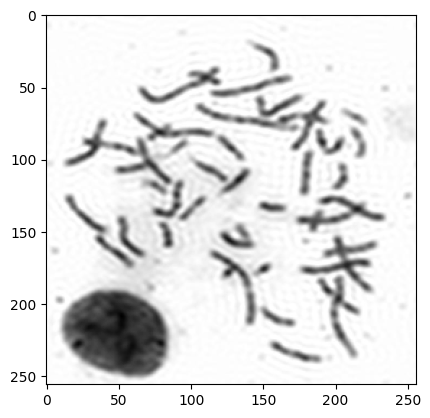

In [28]:
plt.imshow(lowiamge, cmap='gray')

In [29]:
lowiamge = np.reshape(lowiamge,(1,SIZE,SIZE,1))

In [30]:
SIZE =256
highimage = cv2.imread(b,0)

highimage = cv2.resize(highimage, (SIZE, SIZE))
highimage = highimage.astype('float32') / 255.0
highimage = img_to_array(highimage)

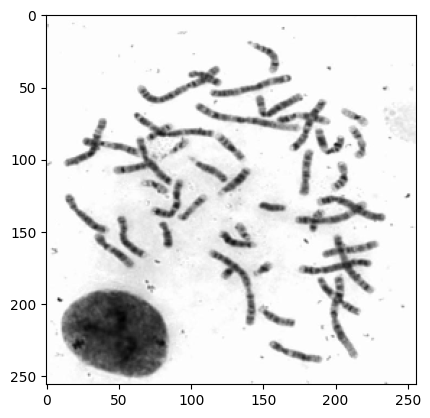

In [31]:
plt.imshow(highimage, cmap='gray')

In [32]:
highimage = np.reshape(highimage,(1,SIZE,SIZE,1))

In [33]:
highimage=highimage.reshape(256,256,1)

In [34]:
lowiamge=lowiamge.reshape(256,256,1)

1/1 [==============================] - 0s 215ms/step


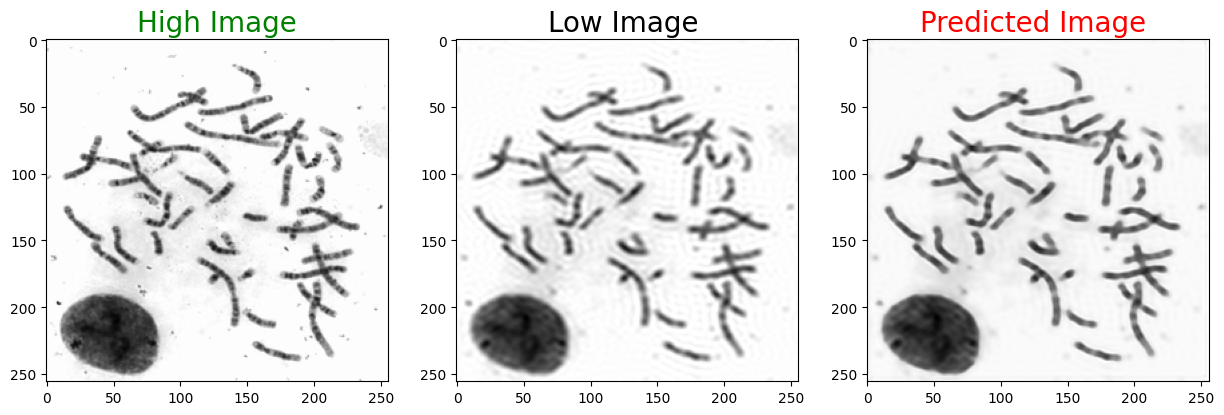

PSNR 29.878866 dB
 SSIM 0.9254366


In [35]:
predicted = np.clip(reconstructed_model.predict(lowiamge.reshape(1,SIZE, SIZE,1)),0.0,1.0).reshape(SIZE, SIZE,3)
predicted = tf.image.rgb_to_grayscale(predicted)
plot_images(highimage,lowiamge,predicted)

print('PSNR',PSNR(highimage,predicted).numpy(),'dB\n' ,"SSIM",tf.image.ssim(highimage,predicted,max_val=1).numpy())